# Kalma Data Analysis

In [ ]:
from google.colab import files
from google.colab import drive
import pandas as pd 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls "/content/drive/My Drive/Kalma"

Friendship-2020-12-18.csv      Story-2020-12-18.csv
Profile_photos-2020-12-18.csv  story_views.csv


**Loading Profile Photos csv**

In [ ]:
profile_photos = pd.read_csv('/content/drive/My Drive/Kalma/Profile_photos-2020-12-18.csv')
profile_photos.head()
profile_photos.tail()

,id,user,approved,photo,modified,created
10194,5,34819,1,static/images/57ab0347e8110b23_HFe7twd.jpg,2019-10-21 21:48:48,2019-07-30 01:27:29
10195,4,103905,1,static/images/f687b6b6a0ec7148.jpg,2019-07-30 01:27:28,2019-07-30 01:24:55
10196,3,104794,1,static/images/2d98e1b928e1e12f.jpg,2019-07-30 01:18:20,2019-07-30 01:12:42
10197,2,83664,1,static/images/0f942352d697bf82_lqxTKPF.jpg,2020-07-26 08:45:14,2019-07-30 01:06:57
10198,1,38062,1,static/images/a37210b04e557b74_UuZqp4o.jpg,2019-07-30 10:23:05,2019-07-29 21:58:28


**Loading Friendship csv**

In [ ]:
friendship = pd.read_csv('/content/drive/My Drive/Kalma/Friendship-2020-12-18.csv')
friendship.head()
friendship.tail()

,id,user1,user2,created
216458,5,358697313678244,358695654658247,2019-05-21 18:23:48
216459,4,357710986782243,358693696693247,2019-05-21 18:23:48
216460,3,357712186794243,357717086789243,2019-05-21 18:23:48
216461,2,353798985780243,352212056222244,2019-05-21 18:23:48
216462,1,352212056222244,358597552677244,2019-05-21 18:23:48


**Loading the stories csv**

In [ ]:
story = pd.read_csv('/content/drive/My Drive/Kalma/Story-2020-12-18.csv')
story.head()
story.tail()

,id,user,photo,modified,created
132166,67860,545962,static/images/72b47de2eb6044318b356d7ce1eb4b01...,2020-05-30 08:19:25,2020-05-30 08:19:25
132167,67859,204201,static/images/6db739ce8d264b7eb5d4d1f996989dd5...,2020-05-30 08:18:40,2020-05-30 08:18:40
132168,67858,307029,static/images/9fb2c9cc69b241d997e5c4aea25ce11a...,2020-05-30 08:16:25,2020-05-30 08:16:25
132169,67857,307029,static/images/7ca9469471954a0d80afa7e4f2b0d90a...,2020-05-30 08:15:59,2020-05-30 08:15:59
132170,67856,480436,static/images/2c60bb0acdc44f8d83948b99626b1b2e...,2020-05-30 08:15:25,2020-05-30 08:15:25


**Loading the stories views csv**

In [ ]:
story_views = pd.read_csv('/content/drive/My Drive/Kalma/story_views.csv',header = None)
story_views.head()
story_views.tail()

,0,1,2,3,4,5
1591014,5331710,2020-12-18 11:04:08.861743,2020-12-18 11:04:08.861792,798374,816245,267364
1591015,5331711,2020-12-18 11:04:10.230974,2020-12-18 11:04:10.231020,636867,158850,267018
1591016,5331725,2020-12-18 11:06:13.478912,2020-12-18 11:06:13.478961,350595,657496,267301
1591017,5331732,2020-12-18 11:06:33.728459,2020-12-18 11:06:33.728508,816245,798374,267366
1591018,5331739,2020-12-18 11:06:53.018464,2020-12-18 11:06:53.018515,792288,657496,267295


In [ ]:
headers=["id","created","modified","story_owner_user_id","story_viewer_user_id","story_id"]

In [ ]:
story_views.columns = headers
story_views.head()

,id,created,modified,story_owner_user_id,story_viewer_user_id,story_id
0,1,2020-05-30 08:21:05.363768,2020-05-30 08:21:05.363816,462724,545386,67862
1,5,2020-05-30 11:08:55.662443,2020-05-30 11:08:55.662492,227523,462724,67937
2,6,2020-05-30 11:08:57.435962,2020-05-30 11:08:57.436011,44725,462724,67924
3,7,2020-05-30 11:08:58.260124,2020-05-30 11:08:58.260169,44725,462724,67926
4,8,2020-05-30 11:08:58.862778,2020-05-30 11:08:58.862826,44725,462724,67930


# **Profile Pictures Analysis**

In [ ]:
profile_photos.describe(include = "all")

,id,user,approved,photo,modified,created
count,10199.000000,10199.000000,10199.000000,10199,10199,10199
unique,NaN,NaN,NaN,10199,4919,10193
top,NaN,NaN,NaN,static/images/48071c402260d1ee_HWPvXvi.jpg,2019-08-30 06:45:58,2020-05-21 09:17:35
freq,NaN,NaN,NaN,1,19,2
mean,5170.113148,489044.084616,0.994411,NaN,NaN,NaN
std,2976.665323,242163.837110,0.074553,NaN,NaN,NaN
min,1.000000,847.000000,0.000000,NaN,NaN,NaN
25%,2594.500000,251276.000000,1.000000,NaN,NaN,NaN
50%,5167.000000,550920.000000,1.000000,NaN,NaN,NaN
75%,7758.500000,697643.500000,1.000000,NaN,NaN,NaN


In [ ]:
profile_photos['created']

0        2020-12-18 11:19:58
1        2020-12-18 10:54:29
2        2020-12-18 09:45:22
3        2020-12-18 06:58:29
4        2020-12-18 02:18:03
                ...         
10194    2019-07-30 01:27:29
10195    2019-07-30 01:24:55
10196    2019-07-30 01:12:42
10197    2019-07-30 01:06:57
10198    2019-07-29 21:58:28
Name: created, Length: 10199, dtype: object

In [ ]:
profile_photos['created'] = pd.to_datetime(profile_photos['created'])

# How many profile pictures are being updated per day 

on minimum 1

on average 20

on maximum 138

In [ ]:
per_d = profile_photos.created.dt.to_period("D")
profile_photos_D = profile_photos['created'].groupby(per_d)
profile_photos_D.count().mean()

20.156126482213438

In [ ]:
profile_photos_D.count().min()

1

In [ ]:
profile_photos_D.count().max()

138

#profile pictures peaks - Hour

5:00 PM







In [ ]:
profile_photos_h = profile_photos['created'].dt.strftime('%H') 
profile_photos_h

0        11
1        10
2        09
3        06
4        02
         ..
10194    01
10195    01
10196    01
10197    01
10198    21
Name: created, Length: 10199, dtype: object

In [ ]:
profile_photos_h.value_counts().sort_values()

04    190
03    210
05    215
02    225
06    236
07    260
01    279
00    327
08    338
23    378
22    455
09    472
21    473
10    497
20    520
13    537
11    540
14    547
19    554
15    556
18    558
12    572
16    600
17    660
Name: created, dtype: int64

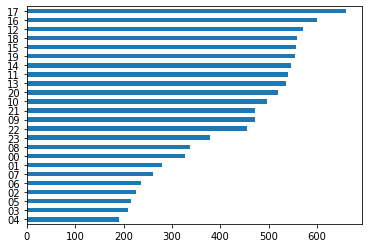

In [ ]:
profile_photos_h.value_counts().sort_values().plot(kind = 'barh')

#profile pictures peaks - Day

'26 / 11 / 2020'





In [ ]:
per = profile_photos.created.dt.to_period("D")
profile_photos_D = profile_photos['created'].groupby(per)
profile_photos_D.count().sort_values() 

created
2019-07-29      1
2019-10-24      1
2019-12-05      1
2020-03-10      1
2020-02-29      1
             ... 
2020-08-23     62
2019-08-03     62
2020-10-03     63
2020-09-18     64
2019-07-30    138
Freq: D, Name: created, Length: 506, dtype: int64

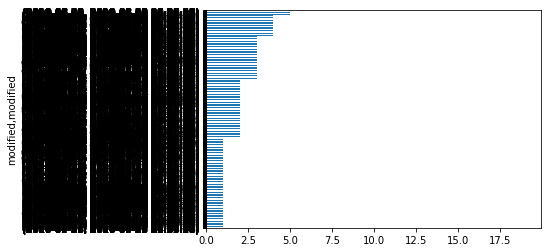

In [ ]:
profile_photos_D.value_counts().sort_values().plot(kind = 'barh')

#profile pictures peaks - Month

August




In [ ]:
per_m = profile_photos.created.dt.to_period("M")
profile_photos_M = profile_photos['created'].groupby(per_m)
profile_photos_M.count().sort_values()

created
2020-02     150
2019-12     174
2019-11     179
2019-07     200
2020-01     216
2019-10     228
2020-03     302
2020-12     354
2020-11     582
2020-04     639
2019-09     650
2020-05     812
2020-10     821
2020-07     823
2020-06     852
2019-08     907
2020-09    1051
2020-08    1259
Freq: M, Name: created, dtype: int64

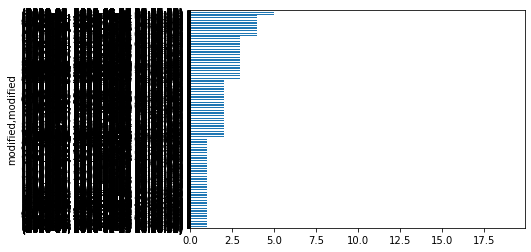

In [ ]:
profile_photos_M.value_counts().sort_values().plot(kind = 'barh')

# **Friendships Analysis**

In [ ]:
friendship.describe(include = "all")

,id,user1,user2,created
count,216463.000000,216463,216462,216463
unique,NaN,69667,71104,211267
top,NaN,587340abd68d1ecd,c0cd64fdb7a653f9,2019-05-21 18:23:49
freq,NaN,558,642,848
mean,333584.097629,NaN,NaN,NaN
std,194720.710668,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,163997.000000,NaN,NaN,NaN
50%,354216.000000,NaN,NaN,NaN
75%,502692.000000,NaN,NaN,NaN


In [ ]:
friendship['created'] 

0         2020-12-18 12:26:18
1         2020-12-18 12:24:22
2         2020-12-18 12:22:19
3         2020-12-18 12:20:37
4         2020-12-18 12:19:12
                 ...         
216458    2019-05-21 18:23:48
216459    2019-05-21 18:23:48
216460    2019-05-21 18:23:48
216461    2019-05-21 18:23:48
216462    2019-05-21 18:23:48
Name: created, Length: 216463, dtype: object

In [ ]:
friendship['created'] = pd.to_datetime( friendship['created'] )

# How many friend requests are being accepted per day  

on minimum 183

on average 424

on maximum 690

In [ ]:
per_d = friendship.created.dt.to_period("D")
friendship_D = profile_photos['created'].groupby(per_d)
friendship_D.count().mean()

424.9583333333333

In [ ]:
friendship_D.count().min()


183

In [ ]:
friendship_D.count().max()

690

#Friendships peaks - Hour

6:00 PM



In [ ]:
friendship_h = friendship['created'].dt.strftime('%H') 
friendship_h

0         12
1         12
2         12
3         12
4         12
          ..
216458    18
216459    18
216460    18
216461    18
216462    18
Name: created, Length: 216463, dtype: object

In [ ]:
friendship_h.value_counts()

18    16846
19    12923
20    12450
17    12284
14    11884
21    11670
15    11625
13    11563
12    11515
16    11238
11    11117
22    10491
10     9469
23     9183
00     7644
09     7563
08     6196
01     5910
07     4996
02     4736
06     4215
03     3783
05     3671
04     3491
Name: created, dtype: int64

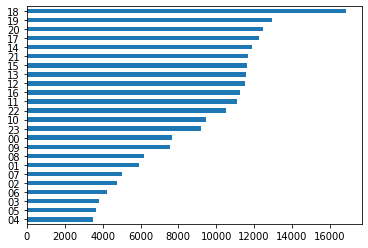

In [ ]:
friendship_h.value_counts().sort_values().plot(kind = 'barh')

#Friendships peaks - Day

'2019-05-21'




In [ ]:
per = friendship.created.dt.to_period("D")
friendship_D = friendship['created'].groupby(per)
friendship_D.count().sort_values()  

created
2019-06-08       1
2019-12-26      54
2020-02-24      56
2020-02-05      61
2019-12-04      62
              ... 
2020-07-15     824
2020-08-13     846
2020-08-11     847
2020-07-13     871
2019-05-21    4229
Freq: D, Name: created, Length: 577, dtype: int64

In [ ]:
friendship_D.value_counts().sort_values().plot(kind = 'barh')

#Friendships peaks - Month
August



In [ ]:
per_m = friendship.created.dt.to_period("M")
friendship_M = friendship['created'].groupby(per_m)
friendship_M.count().sort_values() 

created
2020-02     3265
2019-11     6188
2019-10     6731
2019-12     6892
2020-01     7137
2019-05     7624
2019-06     7925
2020-12     7932
2019-09     9017
2020-11     9685
2020-03     9887
2020-10    12206
2019-07    12256
2019-08    13110
2020-05    13405
2020-04    13828
2020-09    14826
2020-06    16236
2020-07    18866
2020-08    19447
Freq: M, Name: created, dtype: int64

In [ ]:
friendship_M.value_counts().plot(kind = 'barh')

# **Uploading Stories Analysis**

In [ ]:
story.describe(include = "all")

,id,user,photo,modified,created
count,132171.000000,132171.000000,132171,132171,132171
unique,NaN,NaN,132171,131528,131527
top,NaN,NaN,static/images/d57f81f5015949d7a898ccdfb3956242...,2020-10-12 13:33:48,2020-10-12 13:33:48
freq,NaN,NaN,1,3,3
mean,157274.640882,562787.354927,NaN,NaN,NaN
std,59253.572722,173672.722990,NaN,NaN,NaN
min,67856.000000,952.000000,NaN,NaN,NaN
25%,101853.000000,504614.000000,NaN,NaN,NaN
50%,152790.000000,598514.000000,NaN,NaN,NaN
75%,208783.500000,678946.000000,NaN,NaN,NaN


In [ ]:
story['modified'] 

0         2020-12-18 12:29:15
1         2020-12-18 12:27:22
2         2020-12-18 12:26:08
3         2020-12-18 12:25:39
4         2020-12-18 12:25:02
                 ...         
132166    2020-05-30 08:19:25
132167    2020-05-30 08:18:40
132168    2020-05-30 08:16:25
132169    2020-05-30 08:15:59
132170    2020-05-30 08:15:25
Name: modified, Length: 132171, dtype: object

In [ ]:
story['modified']  = pd.to_datetime(story['modified'])

# How many stories are being uploaded per day  

on minimum 181

on average 651

on maximum 1011

In [ ]:
per_d = story.modified.dt.to_period("D")
story_D = story['modified'].groupby(per_d)
story_D.count().mean()

651.0886699507389

In [ ]:
story_D.count().min()

181

In [ ]:
story_D.count().max()

1011

#Stories uploading peaks - Hour

6:00 PM



In [ ]:
story_h = story['modified'].dt.strftime('%H') 
story_h

0         12
1         12
2         12
3         12
4         12
          ..
132166    08
132167    08
132168    08
132169    08
132170    08
Name: modified, Length: 132171, dtype: object

In [ ]:
story_h.value_counts().sort_values()

04    2283
03    2503
05    2543
02    2636
06    3060
01    3294
00    3988
07    4034
08    4746
23    5362
09    5499
22    5893
16    6700
10    6802
15    6818
11    6990
21    6996
17    7158
13    7212
19    7434
14    7483
20    7498
12    7560
18    7679
Name: modified, dtype: int64

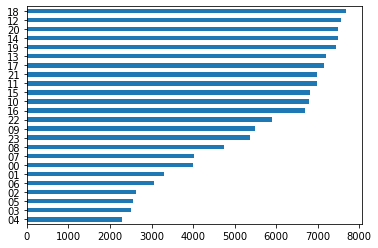

In [ ]:
story_h.value_counts().sort_values().plot(kind = 'barh')

#Stories uploading peaks - Day

'2020-06-10'




In [ ]:
per = story.modified.dt.to_period("D")
story_D = story['modified'].groupby(per)
story_D.count().sort_values() 

modified
2020-12-18     181
2020-11-18     312
2020-11-14     347
2020-11-20     348
2020-11-21     349
              ... 
2020-08-26     949
2020-06-20     950
2020-06-18     956
2020-06-13     976
2020-06-10    1011
Freq: D, Name: modified, Length: 203, dtype: int64

In [ ]:
story_D.value_counts().sort_values().plot(kind = 'barh')

#Stories uploading peaks - Month
June



In [ ]:
per_m = story.modified.dt.to_period("M")
story_M = story['modified'].groupby(per_m)
story_M.count().sort_values() 

modified
2020-05     1376
2020-12     7361
2020-11    12971
2020-10    18082
2020-09    21406
2020-07    22707
2020-08    23112
2020-06    25156
Freq: M, Name: modified, dtype: int64

In [ ]:
story_M.value_counts().plot(kind = 'barh')

# **Viewing Stories Analysis**

In [ ]:
story_views.describe(include = "all")

,id,created,modified,story_owner_user_id,story_viewer_user_id,story_id
count,1.591019e+06,1591019,1591019,1.591019e+06,1.591019e+06,1.591019e+06
unique,NaN,1591016,1591016,NaN,NaN,NaN
top,NaN,2020-11-03 14:56:07.554715,2020-07-18 13:08:46.410566,NaN,NaN,NaN
freq,NaN,2,2,NaN,NaN,NaN
mean,2.533715e+06,NaN,NaN,5.429219e+05,5.395739e+05,1.601989e+05
std,1.551828e+06,NaN,NaN,1.762206e+05,1.776967e+05,5.728266e+04
min,1.000000e+00,NaN,NaN,9.520000e+02,9.520000e+02,6.785600e+04
25%,1.162114e+06,NaN,NaN,4.817560e+05,4.714710e+05,1.087400e+05
50%,2.477886e+06,NaN,NaN,5.746070e+05,5.735300e+05,1.576970e+05
75%,3.881184e+06,NaN,NaN,6.592790e+05,6.622720e+05,2.087480e+05


In [ ]:
story_views['modified'] 

0          2020-05-30 08:21:05.363816
1          2020-05-30 11:08:55.662492
2          2020-05-30 11:08:57.436011
3          2020-05-30 11:08:58.260169
4          2020-05-30 11:08:58.862826
                      ...            
1591014    2020-12-18 11:04:08.861792
1591015    2020-12-18 11:04:10.231020
1591016    2020-12-18 11:06:13.478961
1591017    2020-12-18 11:06:33.728508
1591018    2020-12-18 11:06:53.018515
Name: modified, Length: 1591019, dtype: object

In [ ]:
story_views['modified']  = pd.to_datetime(story_views['modified'])

# How many stories are being viewed per day  

on minimum 1432

on average 7837

on maximum 12951

In [ ]:
per_d = story_views.modified.dt.to_period("D")
story_views_D = story_views['modified'].groupby(per_d)
story_views_D.count().mean()

7837.532019704434

In [ ]:
story_views_D.count().min()

1432

In [ ]:
story_views_D.count().max()

12951

#Stories viewing peaks - Hour

6:00 PM


In [ ]:
story_views_h = story_views['modified'].dt.strftime('%H') 
story_views_h

0          08
1          11
2          11
3          11
4          11
           ..
1591014    11
1591015    11
1591016    11
1591017    11
1591018    11
Name: modified, Length: 1591019, dtype: object

In [ ]:
story_views_h.value_counts().sort_values()

03    26809
02    29520
04    32014
01    33383
05    36345
00    44054
06    48396
07    56516
23    58491
08    63751
09    69390
22    71423
10    80902
13    81929
21    82456
15    82799
16    83012
11    84009
14    84763
17    85983
20    87602
12    88529
19    88705
18    90238
Name: modified, dtype: int64

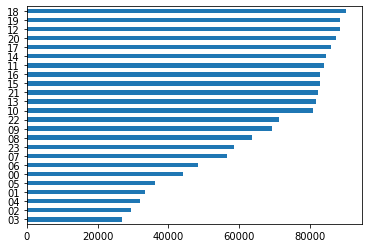

In [ ]:
story_views_h.value_counts().sort_values().plot(kind = 'barh')

#Stories viewing peaks - Day
 
'2020-08-27'



In [ ]:
per = story_views.modified.dt.to_period("D")
story_views_D = story_views['modified'].groupby(per)
story_views_D.count().sort_values() 

modified
2020-12-18     1432
2020-05-30     2690
2020-12-14     3067
2020-12-13     3795
2020-11-21     3997
              ...  
2020-09-27    11964
2020-08-22    11982
2020-10-04    12162
2020-08-26    12266
2020-08-27    12951
Freq: D, Name: modified, Length: 203, dtype: int64

In [ ]:
story_views_D.value_counts().sort_values().plot(kind = 'barh')

#Stories viewing peaks - Month

August



In [ ]:
per_m = story_views.modified.dt.to_period("M")
story_views_M = story_views['modified'].groupby(per_m)
story_views_M.count().sort_values() 

modified
2020-05     10103
2020-12     80333
2020-11    158862
2020-10    237684
2020-06    255161
2020-07    271919
2020-09    278610
2020-08    298347
Freq: M, Name: modified, dtype: int64

In [ ]:
story_views_M.value_counts().plot(kind = 'barh')

NameError: ignored